In [4]:
# Importer les bibliothèques nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ["AAPL", "MC.PA", "TSLA", "NVO", "TTE.PA", "SU.PA", "BABA", "NUE", "ON", "T", "O", "RMS.PA", "GE", "STLAP.PA"]

data = yf.download(tickers, start="2022-09-22", end="2023-09-22")["Adj Close"]

# Calculer les log-rendements quotidiens des actions
log_prices = np.log(data)
returns = log_prices.diff()

print(returns)

[*********************100%%**********************]  14 of 14 completed
                AAPL      BABA        GE     MC.PA       NUE       NVO  \
Date                                                                     
2022-09-22       NaN       NaN       NaN       NaN       NaN       NaN   
2022-09-23 -0.015239 -0.023949 -0.012470 -0.035343 -0.027759 -0.003873   
2022-09-26  0.002258  0.001395 -0.001863  0.005950 -0.023704 -0.027433   
2022-09-27  0.006545 -0.013267  0.001863 -0.004294  0.018210  0.006486   
2022-09-28 -0.012732  0.039285 -0.000155  0.014786  0.015362  0.035444   
...              ...       ...       ...       ...       ...       ...   
2023-09-15 -0.004163 -0.010624 -0.001384  0.024739 -0.063021 -0.012732   
2023-09-18  0.016772 -0.000574  0.009308 -0.024873 -0.004837 -0.020264   
2023-09-19  0.006162  0.001034 -0.003093 -0.007706  0.022503  0.002355   
2023-09-20 -0.020195 -0.015852 -0.011772 -0.000136 -0.017859  0.012802   
2023-09-21 -0.008929 -0.019194 -0.016328 

In [5]:
# Définir le nombre de simulations de Monte Carlo
num_simulations = 20000

# Créer un dataframe vide pour stocker les résultats des simulations
simulations = pd.DataFrame()

# Boucler sur le nombre de simulations
for i in range(num_simulations):

    # Générer des poids aléatoires pour chaque action
    # Les poids doivent être positifs et sommer à 1
    weights = np.random.random(14)
    weights /= np.sum(weights)

    # Calculer le rendement attendu du portefeuille
    portfolio_return = np.sum(returns.mean() * weights) * 252

    # Calculer l'écart-type du portefeuille
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Calculer le ratio de Sharpe du portefeuille
    sharpe_ratio = portfolio_return / portfolio_std

    # Ajouter les résultats à la dataframe des simulations
    simulations = pd.concat([simulations, pd.DataFrame({"Return": [portfolio_return], "Std": [portfolio_std], "Sharpe": [sharpe_ratio]})], ignore_index=True)

# Trouver le portefeuille optimal qui maximise le ratio de Sharpe
optimal_portfolio = simulations.loc[simulations["Sharpe"].idxmax()]

# Afficher les résultats du portefeuille optimal
print("Portefeuille optimal:")
print("Rendement attendu: {:.2f}%".format(optimal_portfolio["Return"] * 100))
print("Volatilité: {:.2f}%".format(optimal_portfolio["Std"] * 100))
print("Ratio de Sharpe: {:.2f}".format(optimal_portfolio["Sharpe"]))

Portefeuille optimal:
Rendement attendu: 39.58%
Volatilité: 15.69%
Ratio de Sharpe: 2.52


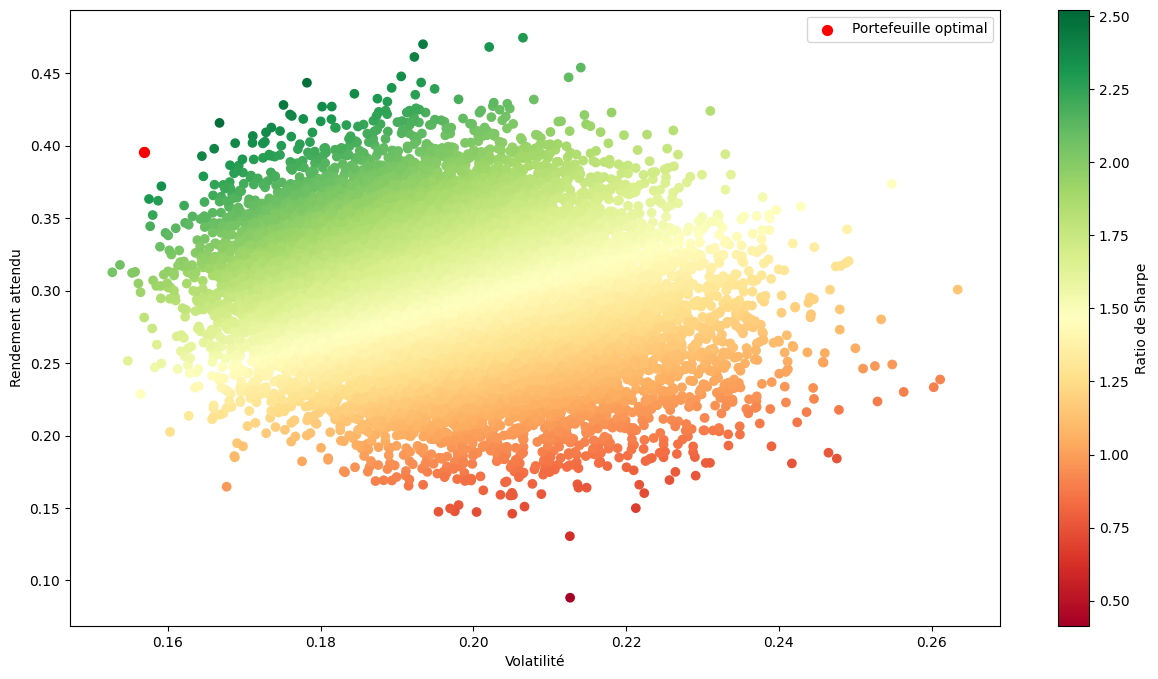

In [6]:
# Tracer les résultats des simulations
plt.figure(figsize=(15, 8))
plt.scatter(simulations["Std"], simulations["Return"], c=simulations["Sharpe"], cmap="RdYlGn")
plt.colorbar(label="Ratio de Sharpe")
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.scatter(optimal_portfolio["Std"], optimal_portfolio["Return"], c="red", s=50, label="Portefeuille optimal")
plt.legend()
plt.show()

In [7]:
# Enregistrer les poids du portefeuille optimal
optimal_weights = weights

# Afficher les poids du portefeuille optimal
print("Poids du portefeuille optimal:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {optimal_weights[i]:.2f}")

Poids du portefeuille optimal:
AAPL: 0.11
MC.PA: 0.13
TSLA: 0.12
NVO: 0.06
TTE.PA: 0.12
SU.PA: 0.05
BABA: 0.07
NUE: 0.06
ON: 0.09
T: 0.12
O: 0.01
RMS.PA: 0.00
GE: 0.00
STLAP.PA: 0.05
